In [57]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn')

#reading data
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

x=dfx.values
y=dfy.values.reshape((-1,))

print(x.shape)
print(y.shape)


(576, 8)
(576,)


In [58]:
print(x)



[[  7.    168.     88.    ...  38.2     0.787  40.   ]
 [  8.    110.     76.    ...  27.8     0.237  58.   ]
 [  7.    147.     76.    ...  39.4     0.257  43.   ]
 ...
 [  2.    122.     60.    ...  29.8     0.717  22.   ]
 [  4.    154.     72.    ...  31.3     0.338  37.   ]
 [  1.     88.     78.    ...  32.      0.365  29.   ]]


In [59]:
print(y)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

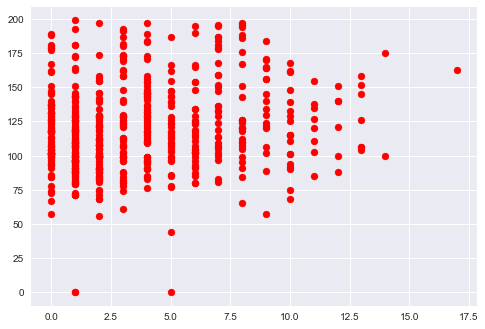

In [64]:
plt.scatter(X[:,0],X[:,1],color="red")
plt.show()

In [65]:
print(dfx.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [66]:
dfx.head(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [67]:
#applying KNN Algorithm
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def KNN(X,Y,query,k):
    
    values = []
    m = X.shape[0]
    
    for i in range(m):
        d = distance(query,X[i])
        values.append((d,Y[i]))
        
    values = sorted(values)
    values = values[:k] 
    values = np.array(values)    
    new_values = np.unique(values[:,1],return_counts=True)
    print(new_values)
    
    index = new_values[1].argmax()
    pred = new_values[0][index]
    
    return pred

In [68]:
#Prediting Results
X_test = pd.read_csv('Diabetes_Xtest.csv')
X_test = X_test.values
print(X_test.shape)

results = []
for i in range(X_test.shape[0]):
    a = KNN(X,Y,query = X_test[i], k=10)
    results.append(a)
    

(192, 8)
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([4, 6], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([7, 3], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([8, 2], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([9, 1], dtype=int64))
(array([array([0], dtype=int64)], dtype=object), array([10], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([4, 6], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([4, 6], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([5, 5], dtype=int64))
(array([array([0], dtype=int64)], dtype=object), array([10], dtype=int64))
(array([array([0], dtype=int64), array([1], dtype=int64)], dtype=object), array([6, 4], dtype=int64))
(array([array([1], dtype=

In [43]:
results = np.array(results)
print(results.reshape((192,)))

[1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0
 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 1 0 0]
